<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       296 non-null    float64
 1   Sex       296 non-null    float64
 2   Cp        296 non-null    float64
 3   trestbps  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    float64
 6   restecg   296 non-null    float64
 7   thalach   296 non-null    float64
 8   exang     296 non-null    float64
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    float64
 11  ca        296 non-null    float64
 12  thal      296 non-null    float64
 13  num       296 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.5 KB
None
              Age         Sex          Cp    trestbps        chol         fbs  \
count  296.000000  296.000000  296.000000  296.000000  296.000000  296.000000   
mean    54.513514    0.675676    3.165541  131.64864

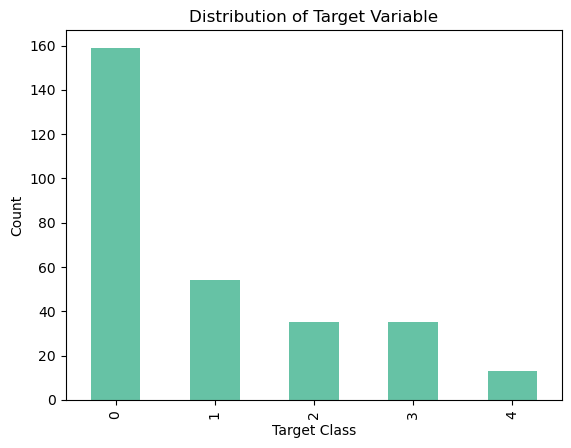

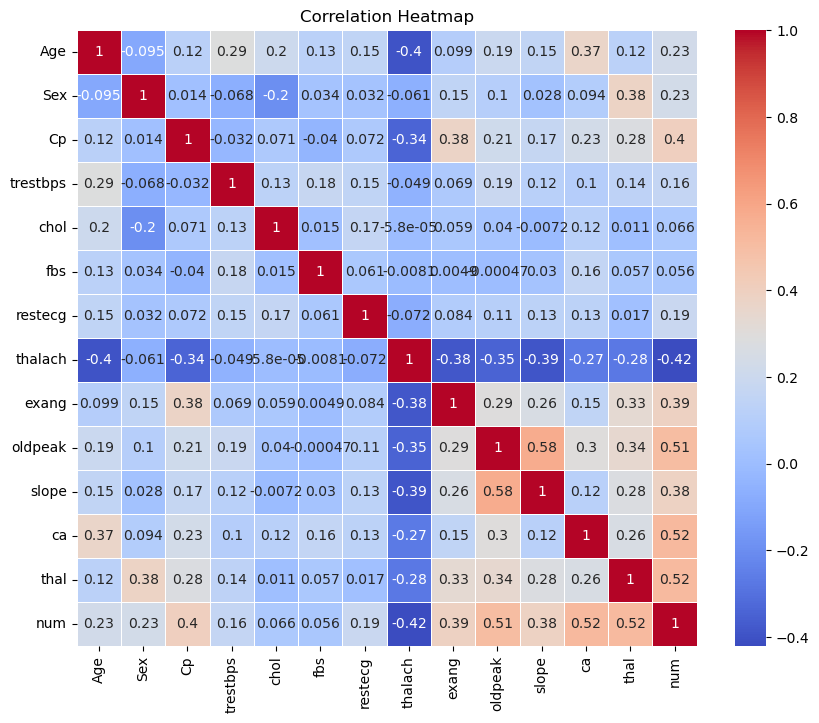

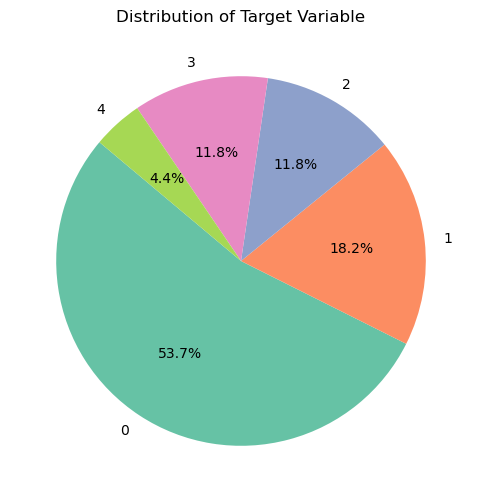

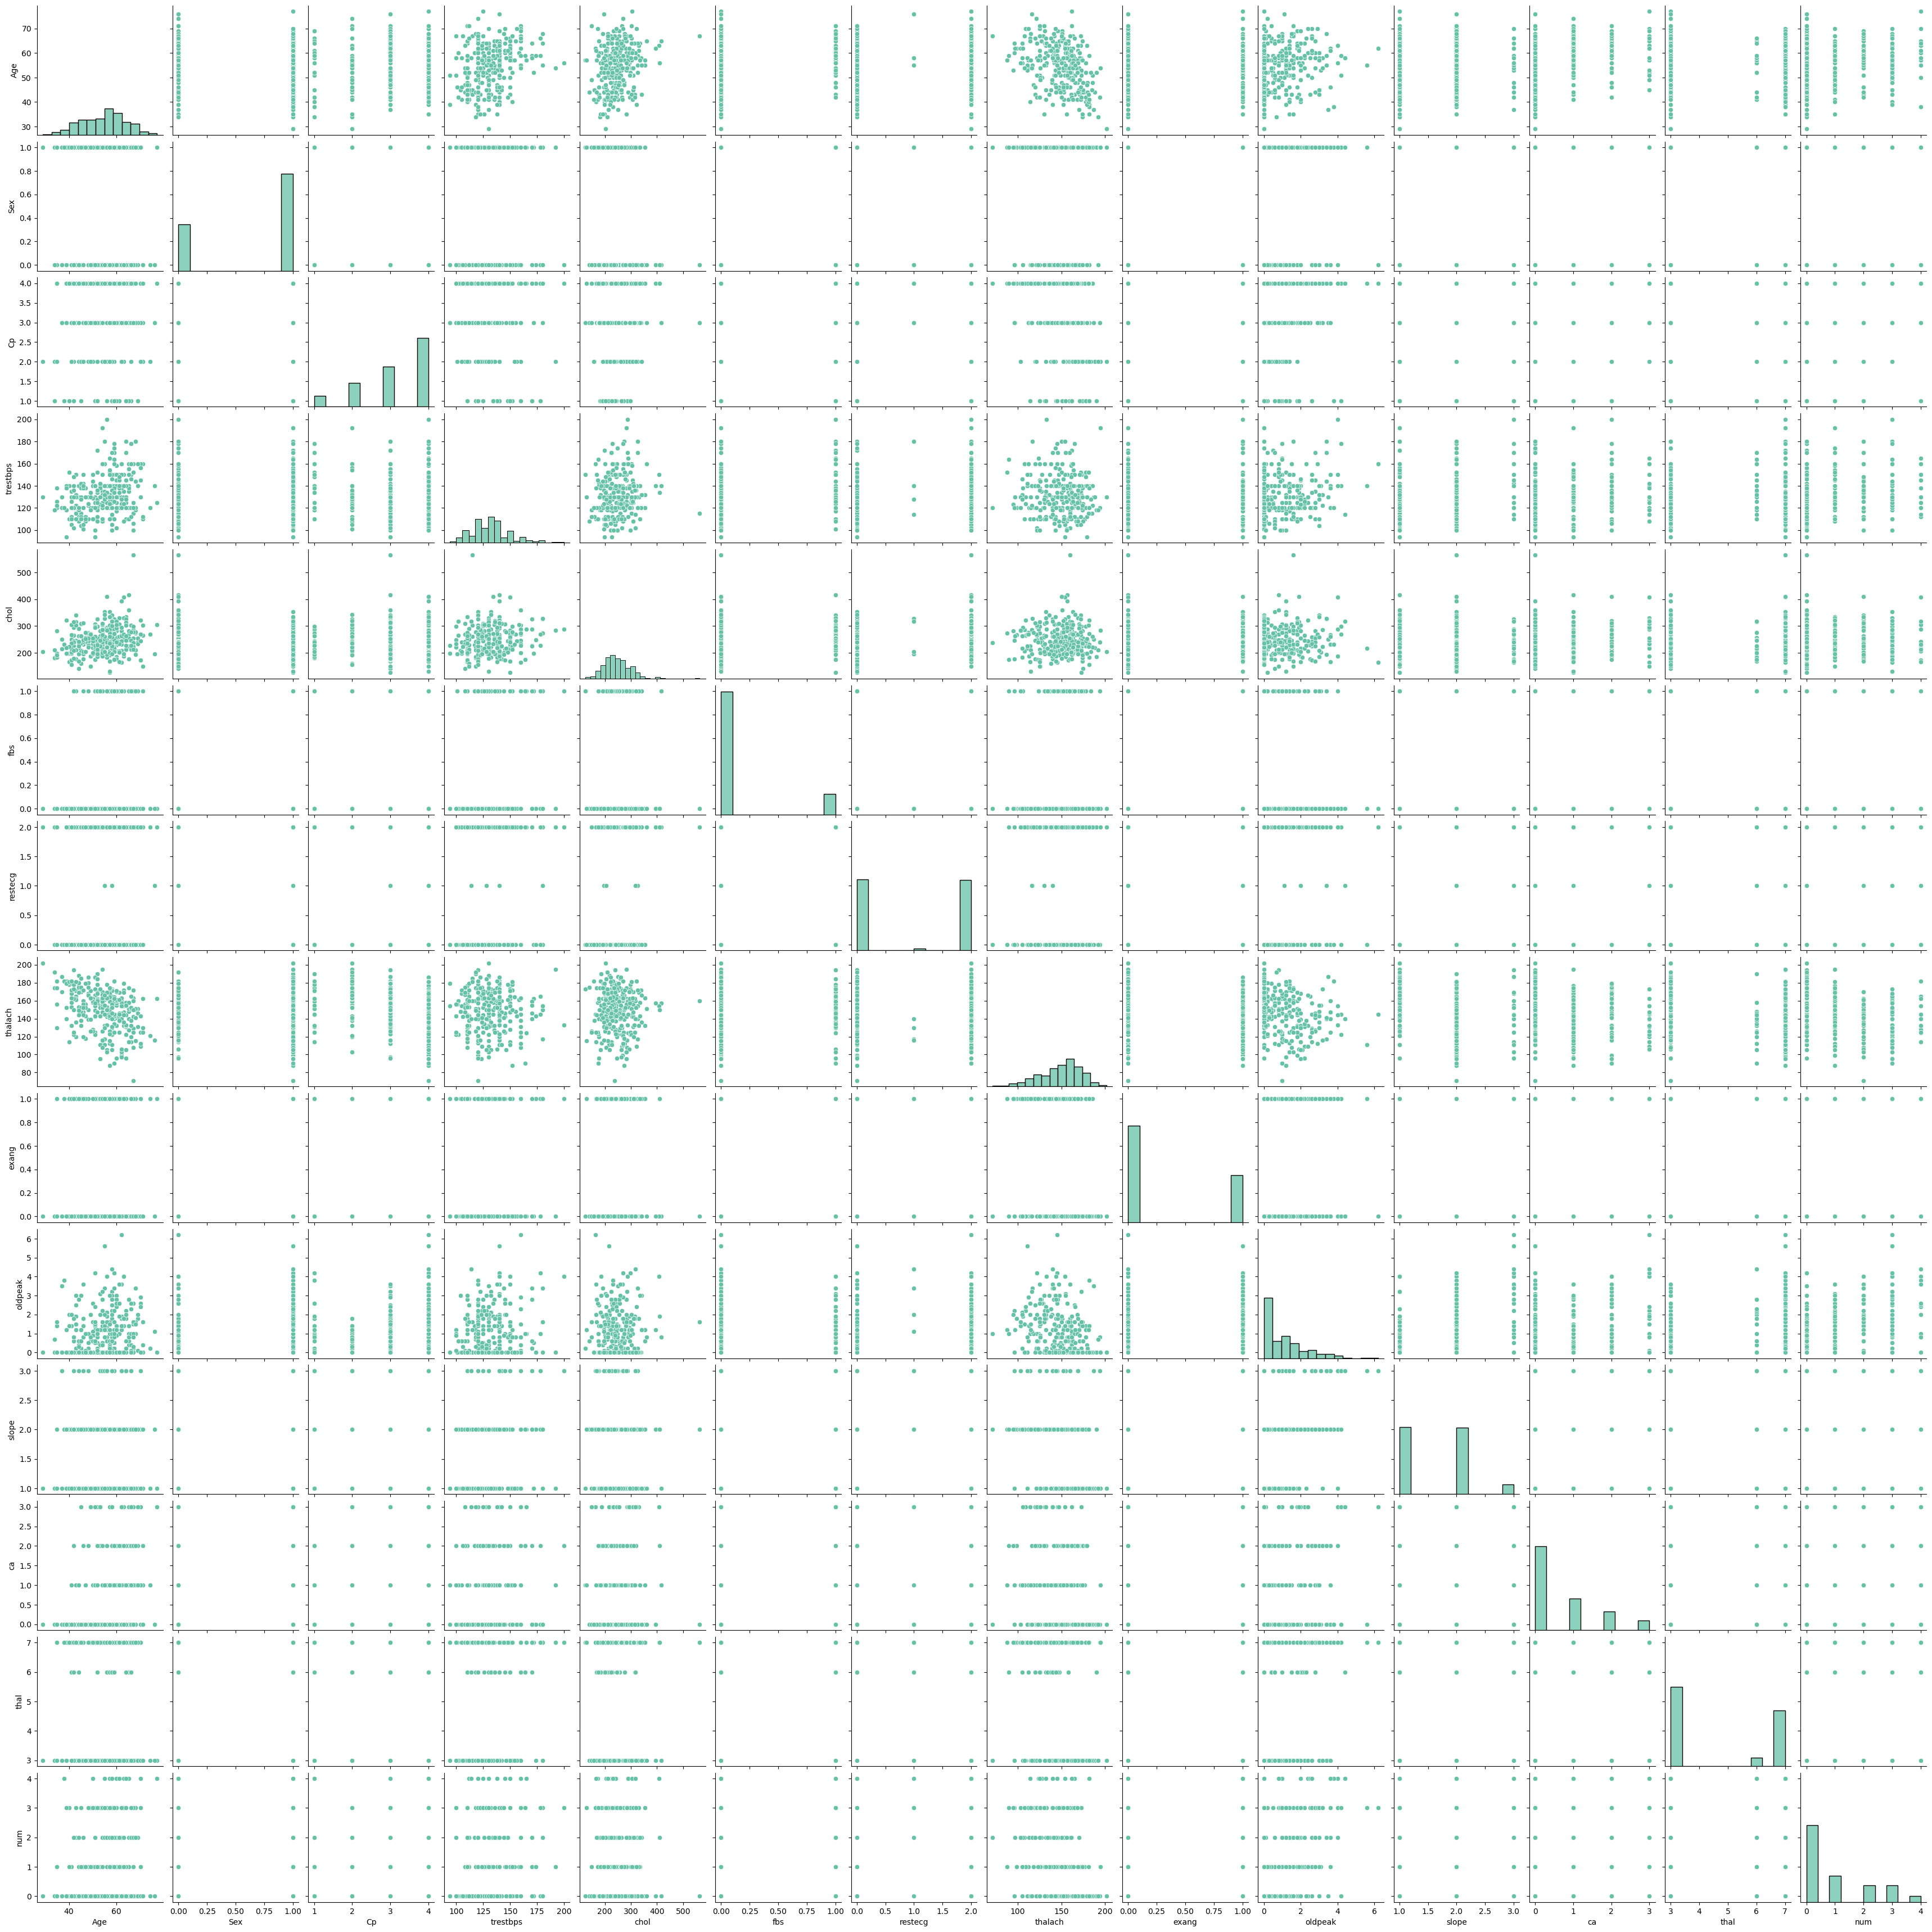

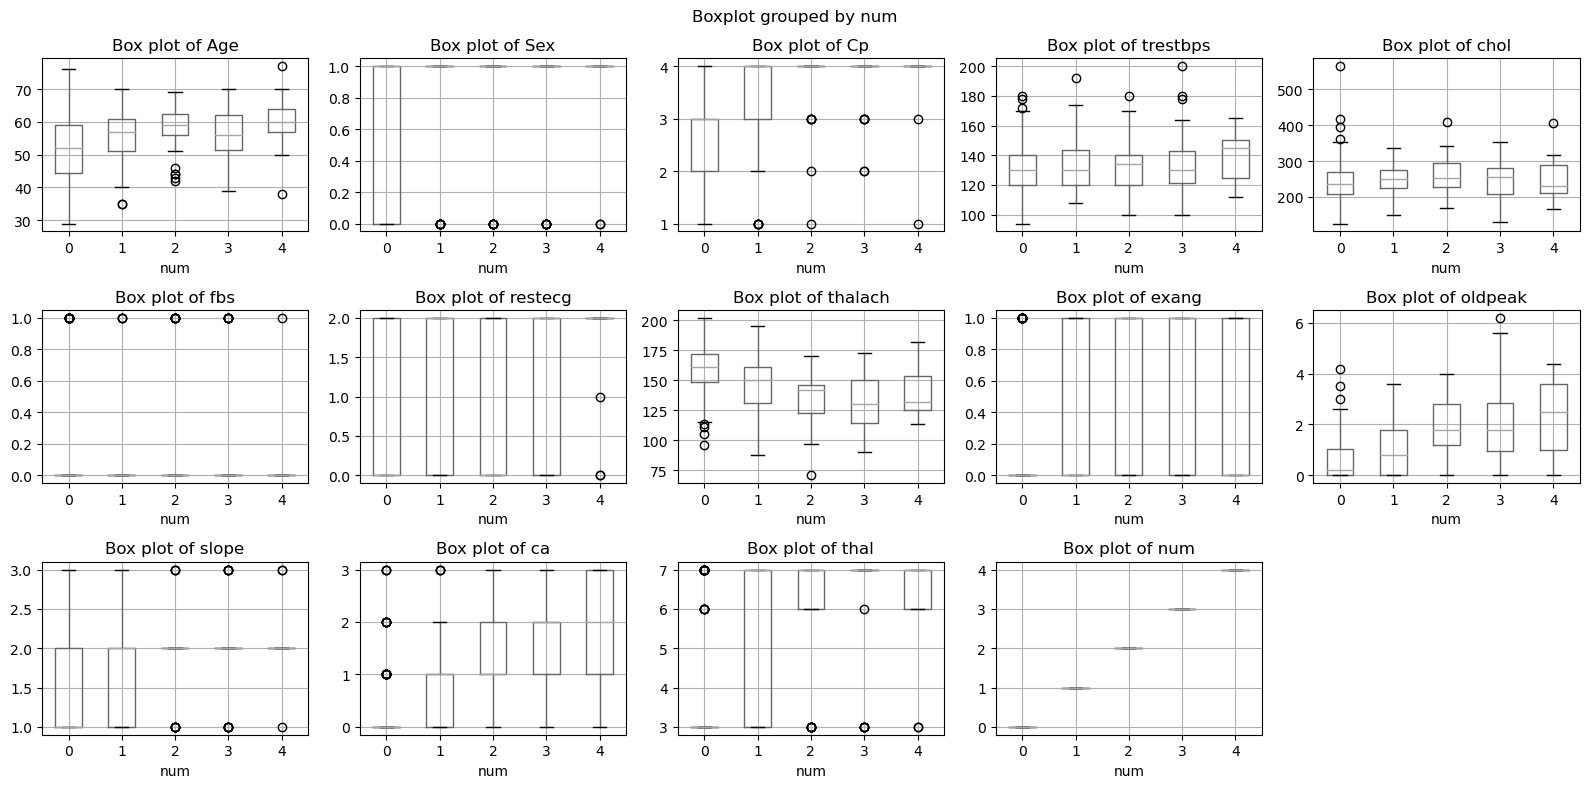

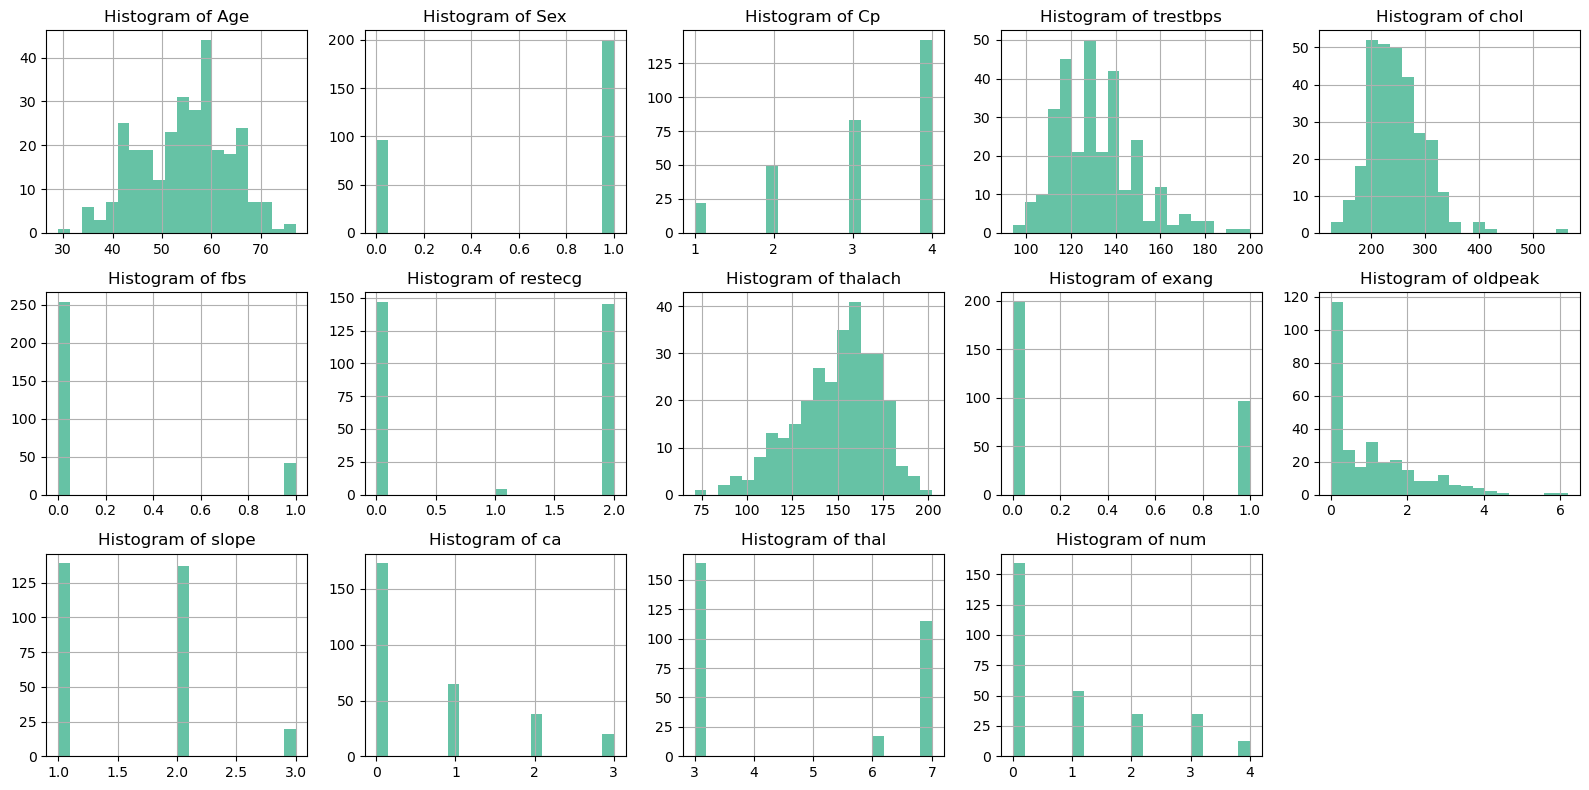

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv")  

# Rename the columns as Feature 1, Feature 2, and so on
l = ['Age','Sex', 'Cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
# Rename the columns
data.columns = l

# Determine the target column (last column)
target_column_name = data.columns[-1]

# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Count the number of unique values in each column
print(data.nunique())

# Visualize the distribution of the target variable using a bar plot
target_counts = data[target_column_name].value_counts()
target_counts.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

# Create a pair plot to visualize relationships between numerical features (if applicable)
# Note: Matplotlib does not have built-in pair plot functionality, so you might consider using Seaborn for this specific task
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pie Chart for the distribution of the target variable
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.show()

# Pair Plot with Histograms for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
sns.pairplot(data=numerical_columns, diag_kind='hist')
plt.show()
# Create a correlation heatmap to visualize feature correlations (if applicable)
# Note: Matplotlib does not have built-in heatmap functionality, so you might consider using Seaborn for this specific task

# Box plots for numerical features by target variable
plt.figure(figsize=(16, 8))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 5, i + 1)
    data.boxplot(column=column, by=target_column_name, ax=plt.gca())
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

# Histograms for numerical features
plt.figure(figsize=(16, 8))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 5, i + 1)
    data[column].hist(bins=20, ax=plt.gca())
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
data = pd.read_csv('data.csv')
labels = data.columns[-1]
# print(labels)
data[labels] = data[labels].apply(lambda x: 1 if x > 0 else 0)
X = data.drop(columns=[labels])
y = data[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results = {}

# Define the decision tree classifiers with 'entropy' and 'gini' criteria
criteria = ['entropy', 'gini']

for criterion in criteria:
    # Create a DecisionTreeClassifier with the specified criterion
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    
    # Perform cross-validation to estimate model accuracy
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    # Store the mean accuracy score in the results dictionary
    results[criterion] = np.mean(scores)

# Determine the best criterion based on accuracy
best_criterion = max(results, key=results.get)

# Train the final decision tree model with the best criterion on the full training set
final_clf = DecisionTreeClassifier(criterion=best_criterion, random_state=42)
final_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = final_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy scores based on criteria:")
for criterion, score in results.items():
    print(f"{criterion}: {score:.4f}")

print(f"The best criterion for attribute selection is: {best_criterion}")
print(f"Test accuracy with the best criterion: {test_accuracy:.4f}")



Accuracy scores based on criteria:
entropy: 0.7416
gini: 0.7164
The best criterion for attribute selection is: entropy
Test accuracy with the best criterion: 0.7667


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

best_criterion = 'entropy'
clf = DecisionTreeClassifier(criterion=best_criterion, random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'min_samples_split': [2, 5, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a decision tree with the best hyperparameters on the full training set
best_clf = DecisionTreeClassifier(criterion=best_criterion, **best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Evaluate the model with the best hyperparameters on the test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Best hyperparameters found by Grid Search:")
print(best_params)
print(f"Test accuracy with the best hyperparameters: {test_accuracy:.4f}")


Best hyperparameters found by Grid Search:
{'max_features': None, 'min_samples_split': 20}
Test accuracy with the best hyperparameters: 0.7667


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Random Forest classifier with the best hyperparameters on the full training set
best_clf = RandomForestClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Evaluate the model with the best hyperparameters on the test set
y_pred = best_clf.predict(X_test)

# Report the best hyperparameters
print("Best hyperparameters found by Grid Search:")
print(best_params)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred,zero_division=1)
print("Classification Report on Test Data:")
print(classification_rep)


Best hyperparameters found by Grid Search:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.86      0.79      0.83        24

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60

